<a href="https://colab.research.google.com/github/NagarajaN-Nethi/Task-3---To-Explore-Unsupervised-Machine-Learning/blob/master/Task_3_To_Explore_Unsupervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task # 3** - To Explore Unsupervised Machine Learning



## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the Data

In [2]:
df = pd.read_csv('/content/drive/My Drive/Data/iris.csv')
df.drop('Id', axis = 1, 
        inplace = True)

## Various information about the data

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the Data

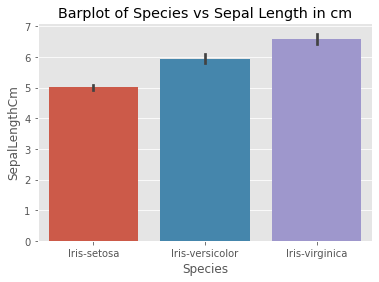

In [7]:
plt.style.use('ggplot')
sns.barplot(x= "Species", y= "SepalLengthCm" , data = df)
plt.title('Barplot of Species vs Sepal Length in cm');

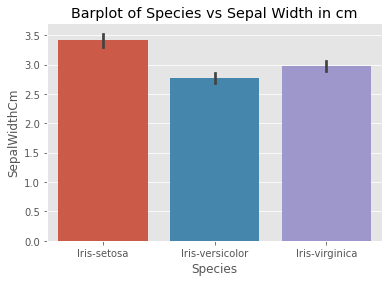

In [8]:
plt.style.use('ggplot')
sns.barplot(x= "Species", y= "SepalWidthCm" , data = df)
plt.title('Barplot of Species vs Sepal Width in cm');

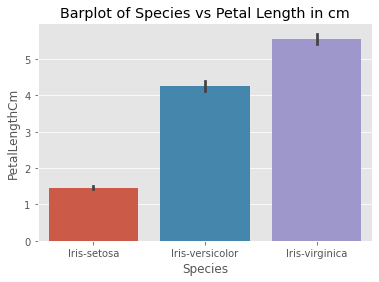

In [9]:
plt.style.use('ggplot')
sns.barplot(x= "Species", y= "PetalLengthCm" , data = df)
plt.title('Barplot of Species vs Petal Length in cm');

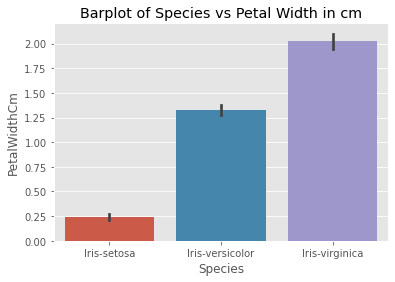

In [10]:
plt.style.use('ggplot')
sns.barplot(x= "Species", y= "PetalWidthCm" , data = df)
plt.title('Barplot of Species vs Petal Width in cm');

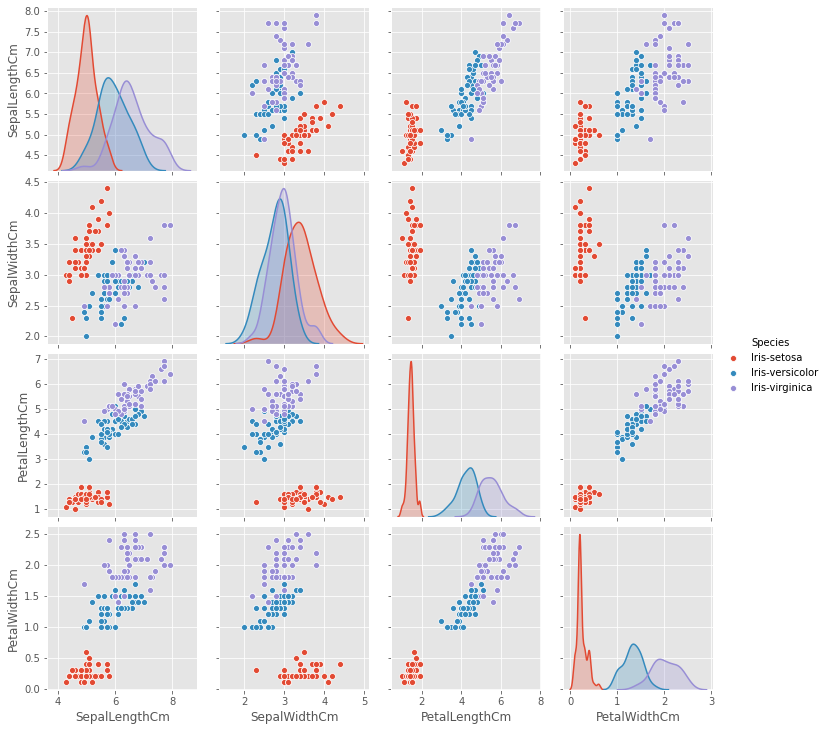

In [11]:
plt.style.use('ggplot')
sns.pairplot(df, hue = 'Species');

In [12]:
X = df.iloc[:,:-1].values

## Elbow Method to obtain the Number of Clusters

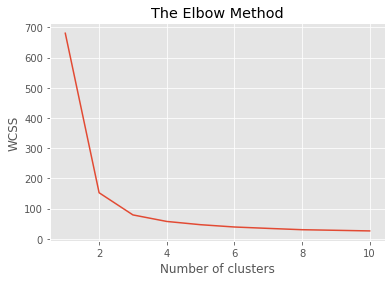

In [13]:
plt.style.use('ggplot')
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.axvline(3,color='r')
plt.show()

#### The number of clusters should be 3 as seen in the above plot.

## Fitting the Model

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 1000, n_init = 10, random_state = 14)
y_kmeans = kmeans.fit_predict(X)

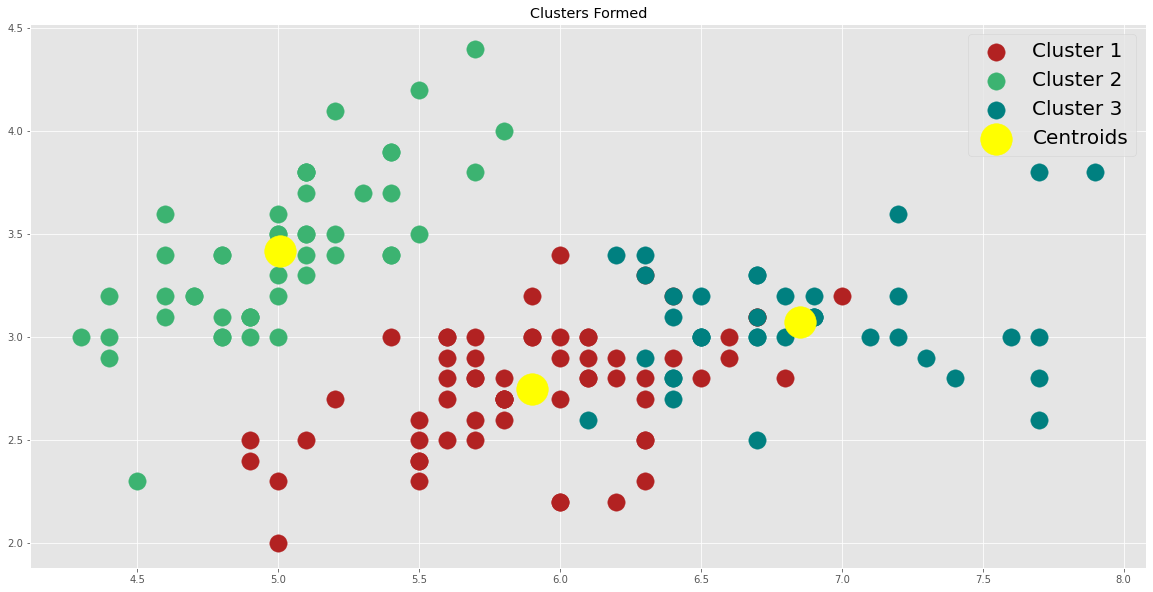

In [15]:
plt.figure(figsize = (20,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 300, c = 'firebrick', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 300, c = 'mediumseagreen', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 300, c = 'teal', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 1000, c = 'yellow', label = 'Centroids')
plt.title('Clusters Formed')
plt.legend(fontsize = 20)
plt.show()